In [1]:
import numpy as np

In [3]:
S = np.load('../../simulations/flow_i-l_2.199-time_2500hr-rate_5Hz.npy')
n,m,t = S

In [33]:
def rt_cdf_marginal(t,m,mstar,dt,tmax):
    """compute the return time distribution conditional to (integer) elevation mstar given a time series of transitions t
    and a series m(t) of bed elevations across this time series"""
    departures, = np.where( (np.roll(m,1) <= mstar) & (m > mstar) ) # indices of depature from mstar
    returns, = np.where( (np.roll(m,1) > mstar) & (m <= mstar)  ) # indices of return to mstar
    # must start from a departure
    while returns.min()<departures.min():
        returns = returns[1:]
    # must end at a return
    while returns.max()<departures.max():
        departures = departures[:-1]
    # compute the return times
    rt = t[returns] - t[departures]
    # generate a return time distribution to elevation mstar from above
    bins = np.arange(10.0, tmax , dt)
    H,bins = np.histogram( rt , bins = bins)
    dx = bins[1] - bins[0] # bin size
    F = np.cumsum(H)*dx # cumulative distribution of return time
    return F

In [34]:
t.max()

9000000.0040932782

In [35]:
dt = 3.0
mstar = round(m.mean()-m.std()*2)
tmax = t.max()
F = rt_cdf_marginal(t,m,mstar,dt,tmax)

In [36]:
bins = np.arange(10.0,tmax,dt)
bins = (bins[1:]+bins[:-1])/2.0

(1000.0, 100000.0)

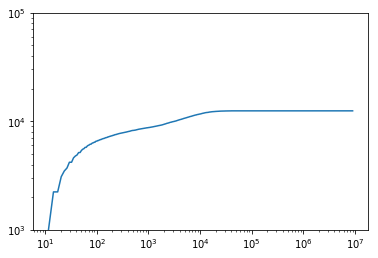

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.loglog(bins,F)
plt.ylim(1e3,1e5)
#plt.xlim(1e-2,30)